<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
Missing values in each column:
Order ID                    0
Customer ID                 0
Restaurant ID           

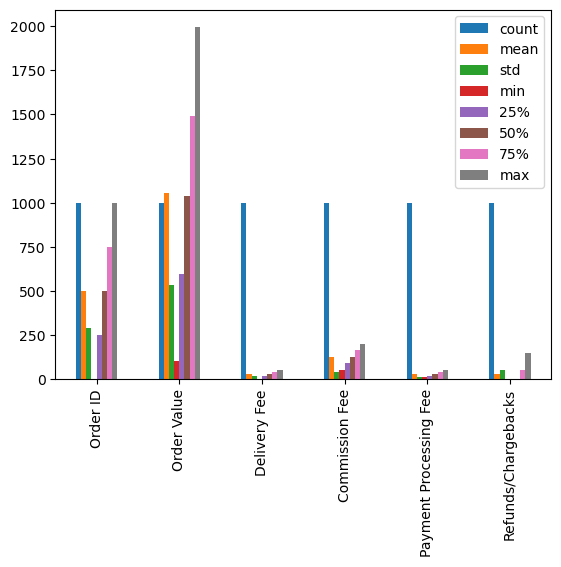

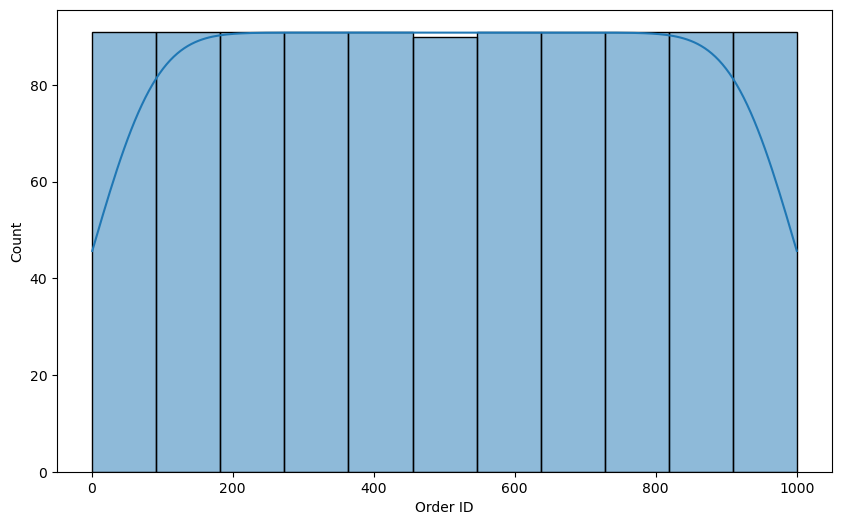

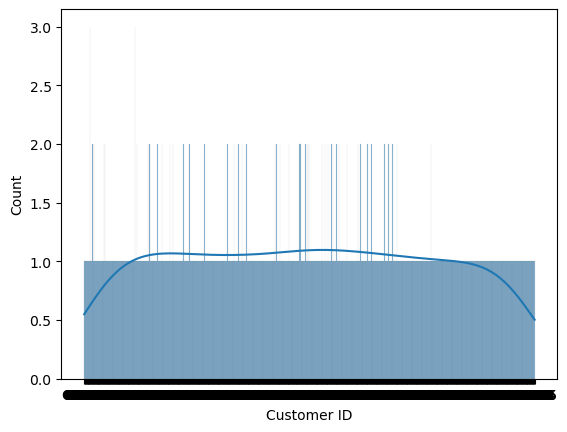

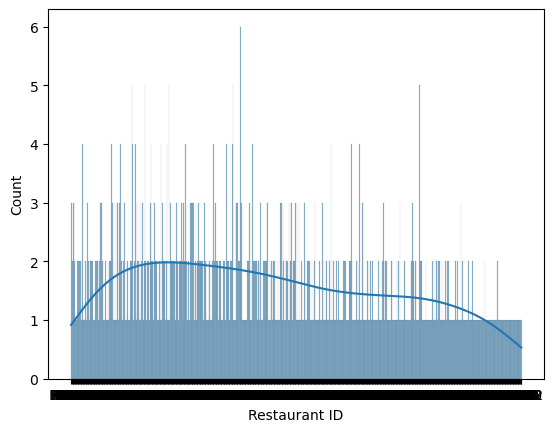

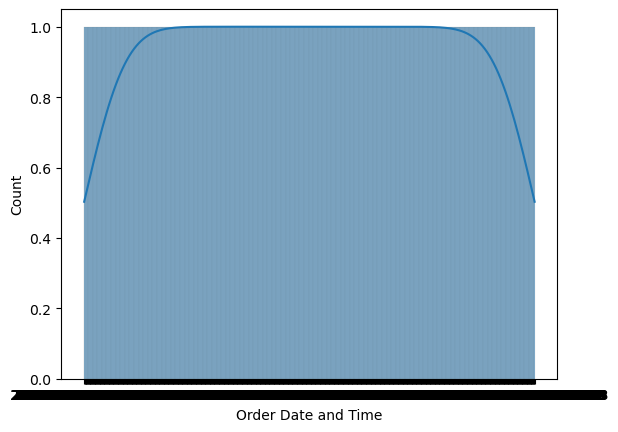

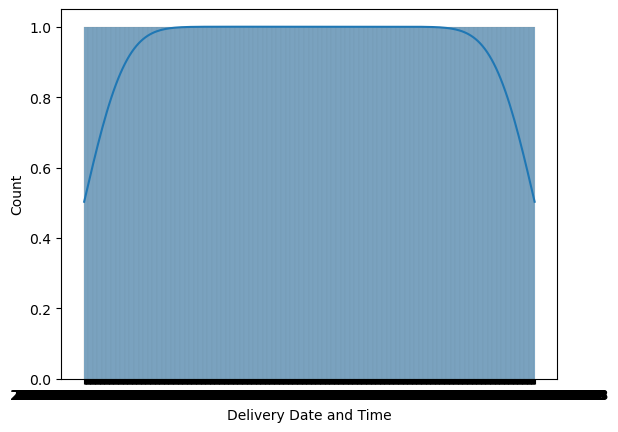

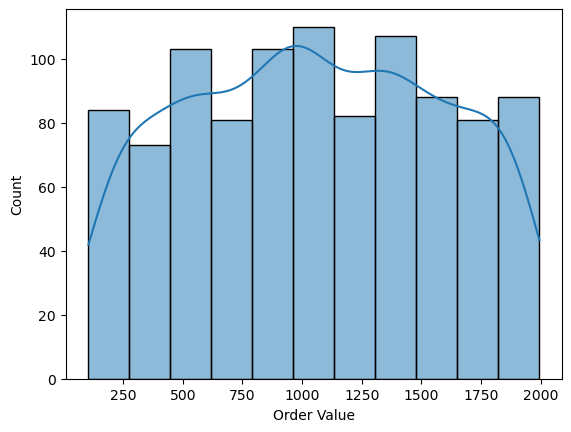

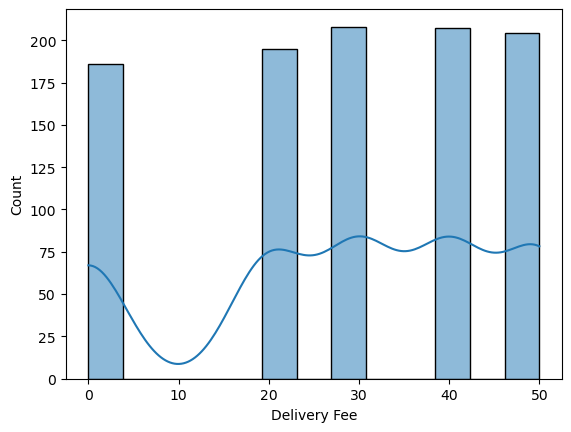

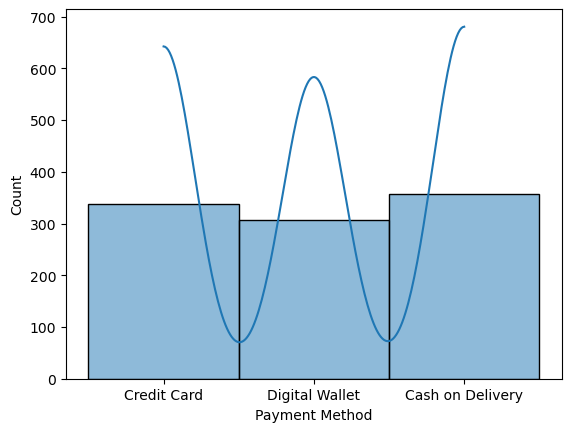

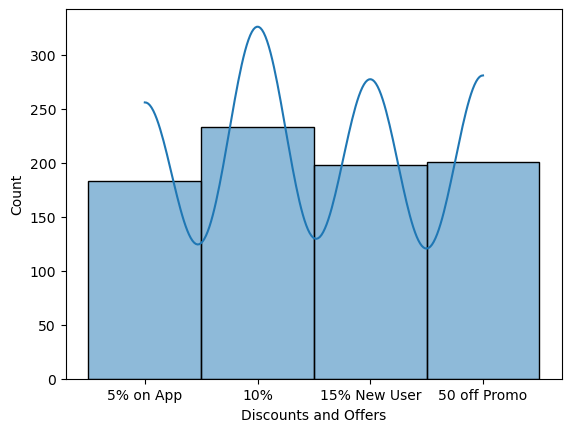

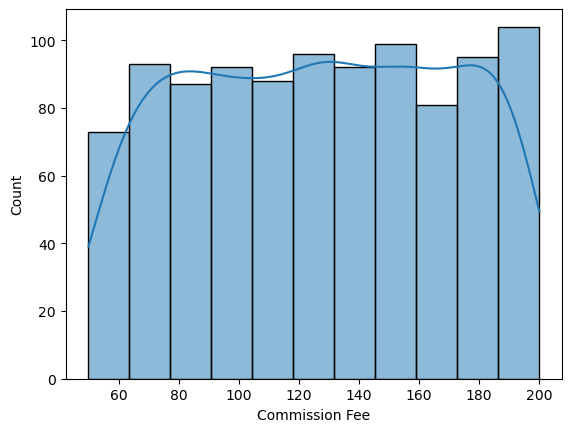

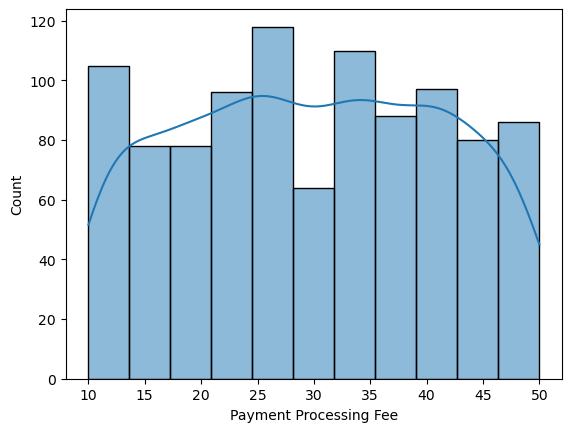

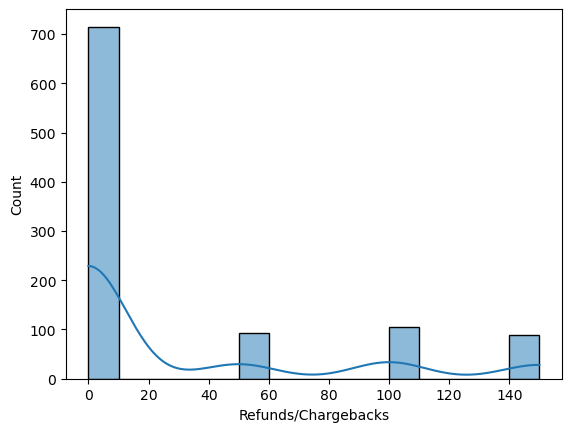

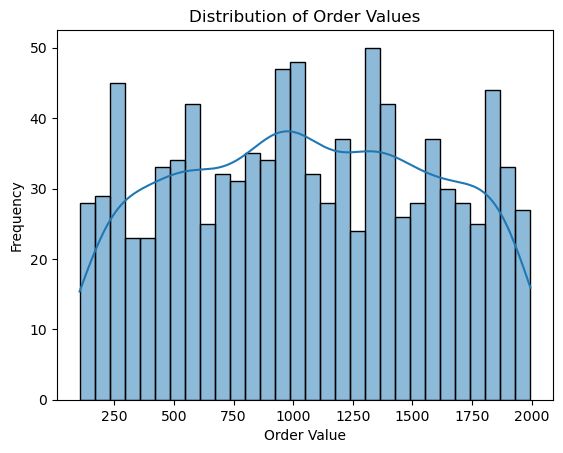

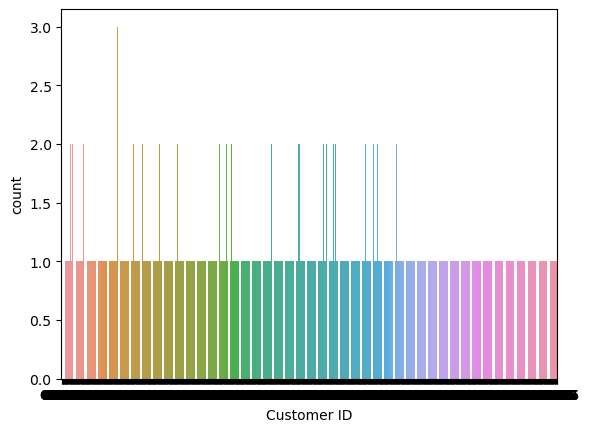

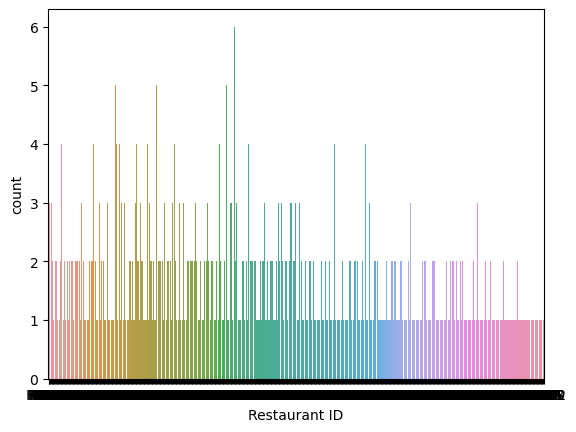

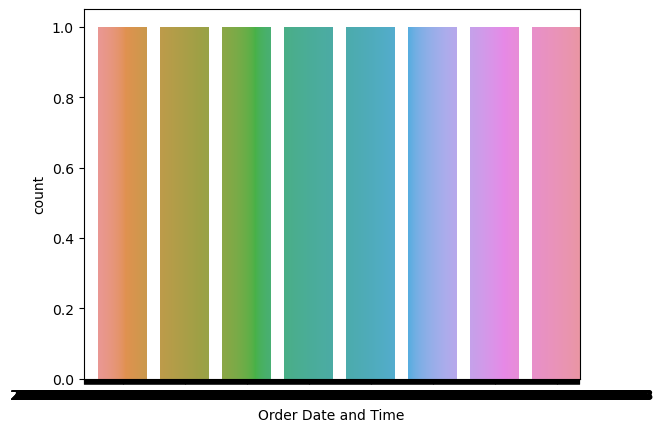

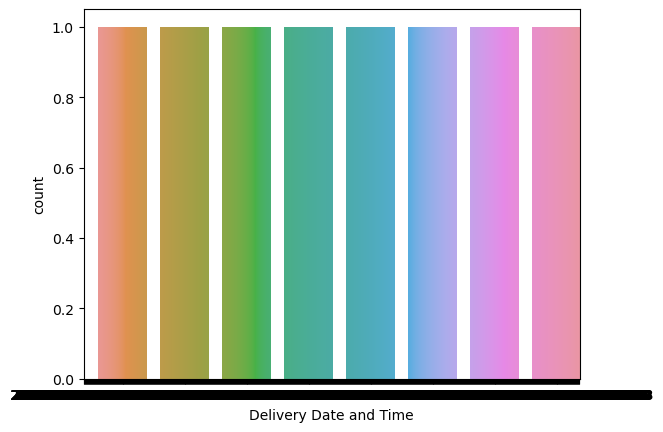

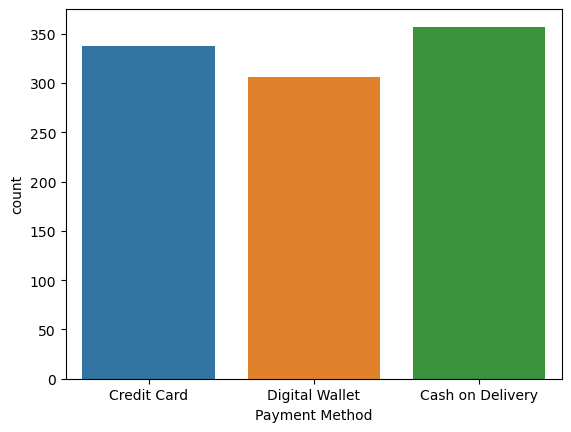

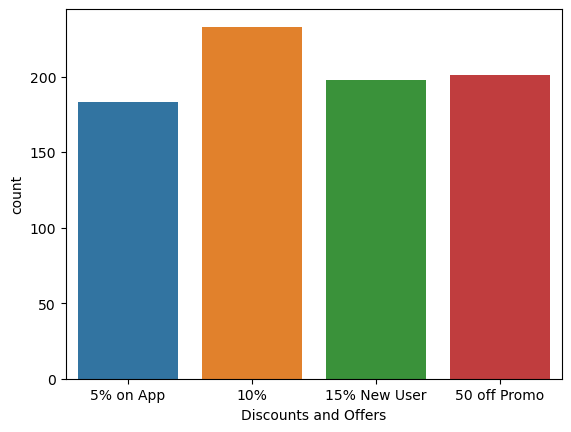

(304.18568253105525, -0.019260925758509684)

In [3]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset from the specified path
# Make sure to update this path to the one from your previous project
df = pd.read_csv("/Users/ashwinibhandari/Desktop/Big_Mart_Sales_files/food_orders_new_delhi (1).csv", encoding='ISO-8859-1', header=0)

# Display the first few rows of the DataFrame
df.head()

# Display the last few rows of the DataFrame
df.tail()

# Get the shape of the DataFrame (number of rows and columns)
df.shape

# Check for missing values in each column
df.isnull().sum()

# Get detailed information about the DataFrame (data types, non-null counts, etc.)
df.info()

# Check for any NA values in the DataFrame
df.isna().sum()

# Print missing values in each column for better visibility
print("Missing values in each column:")
print(df.isnull().sum())

# Generate summary statistics of the DataFrame and plot them as a bar chart
df.describe().T.plot(kind='bar')

# Import necessary libraries for correlation analysis
import plotly.express as px

# Select only numeric columns from the DataFrame for correlation analysis
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix using Plotly for visual representation
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

# Plot the distribution of order values using Seaborn
plt.figure(figsize=(10, 6))

# Iterate over each column in the DataFrame
for col in df:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

# Specifically plot the distribution of 'Order Value'
sns.histplot(df['Order Value'], bins=30, kde=True)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

# Iterate over each column to create count plots for categorical columns
for col in df:
    if df[col].dtype == 'O':  # Check if the column is categorical
        sns.countplot(x=col, data=df)
        plt.show()

# Define the columns of interest for distribution plots
columns = [
    'Order ID',
    'Customer ID',
    'Restaurant ID',
    'Order Date and Time',
    'Delivery Date and Time',
    'Order Value',
    'Delivery Fee',
    'Payment Method',
    'Discounts and Offers',
    'Commission Fee',
    'Payment Processing Fee',
    'Refunds/Chargebacks'
]

# Iterate through the specified columns to create bar charts or histograms
for column in columns:
    try:
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count occurrences of each unique value in the column
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using Plotly Express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable for modeling
# Drop 'Delivery Fee' as it will be the target variable
X = numeric_df.drop(columns=['Delivery Fee'])
y = numeric_df['Delivery Fee']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Return the evaluation metrics
(mse, r2)


Top 15 preforming resteraunts and average time of service

Top 15 performers chart:


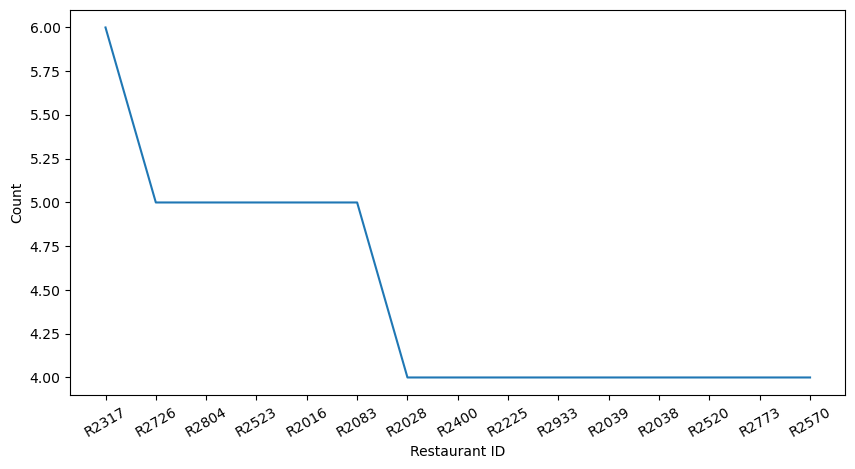

Top 15 performers chart (fullfillment/service time):


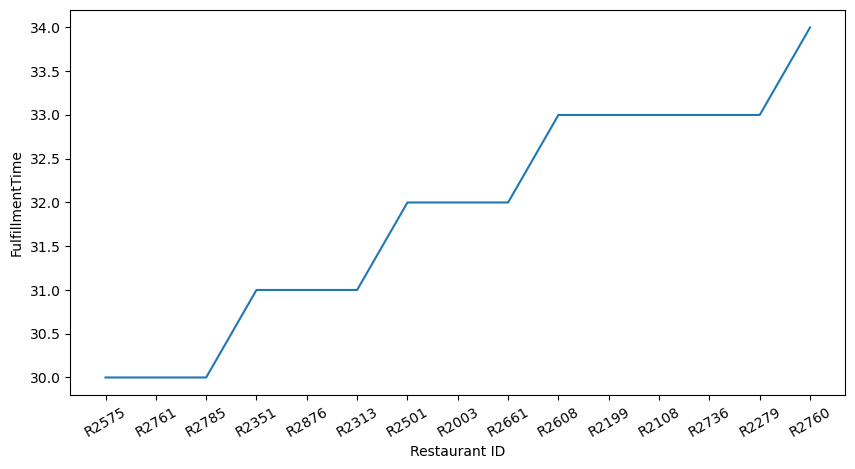

Top performers chart and their average fufillment times:


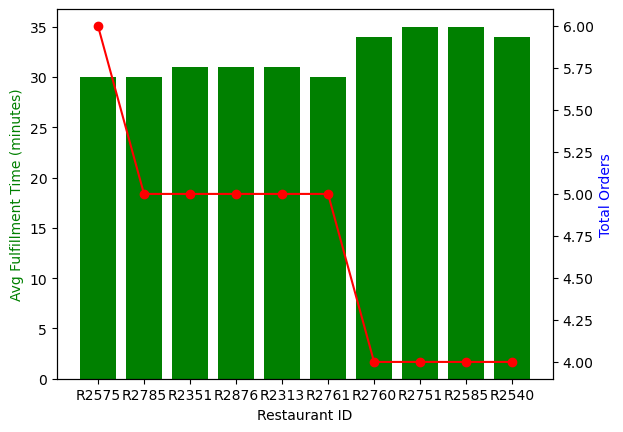

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Rename columns to more concise names
df1 = df.rename(columns={"Order Date and Time": "OrderTime",
                         "Delivery Date and Time": "DeliveryTime",
                         "Order Value": "Amount",
                         "Delivery Fee": "DeliveryFee",
                         "Payment Method": "PaymentMethod",
                         "Commission Fee": "CommissionFee",
                         "Payment Processing Fee": "ProcessingFee",
                         "Refunds/Chargebacks": "Refunds"})

# Add a 'Count' column to count the number of orders
df1['Count'] = 1

# Convert 'OrderTime' and 'DeliveryTime' columns to datetime format
df1['OrderTime'] = pd.to_datetime(df1['OrderTime'])
df1['DeliveryTime'] = pd.to_datetime(df1['DeliveryTime'])

# Plotting the number of orders per restaurant
plt.figure(figsize=(10, 5))
plt.xticks(rotation=30)

# Grouping by 'Restaurant ID' to count the number of orders
df2 = df1.groupby("Restaurant ID").agg({"Count": "sum"}).reset_index().sort_values(by='Count', ascending=False)

# Plotting the top 15 restaurants by the number of orders
print("Top 15 performers chart:")
sns.lineplot(x='Restaurant ID', y='Count', data=df2.head(15))
plt.show()

# Copy dataframe to calculate the fulfillment time
df3 = df1.copy()

# Subtracting 'OrderTime' from 'DeliveryTime' to calculate fulfillment time in minutes
df3['FulfillmentTime'] = df3['DeliveryTime'] - df3['OrderTime']
df3['FulfillmentTime'] = df3['FulfillmentTime'].dt.seconds / 60  # Converting to minutes

# Grouping by 'Restaurant ID' and calculating the average 'FulfillmentTime' per restaurant
df3 = df3.groupby('Restaurant ID').agg({"FulfillmentTime": "mean"}).reset_index().sort_values(by='FulfillmentTime')

# Plotting the top 15 restaurants by average fulfillment time
print("Top 15 performers chart (fullfillment/service time):")
plt.figure(figsize=(10, 5))
plt.xticks(rotation=30)
sns.lineplot(x='Restaurant ID', y='FulfillmentTime', data=df3.head(15))
plt.show()

# Add the total orders count to the 'df3' dataframe
df3['TotalOrders'] = df2['Count'].values

# Sort by total orders for the final visualization
df3 = df3.sort_values(by='TotalOrders', ascending=False)

# Plotting average fulfillment time and total orders for the top 10 restaurants
x = df3['Restaurant ID'].head(10)
y = df3['FulfillmentTime'].head(10)
y1 = df3['TotalOrders'].head(10)

fig, ax1 = plt.subplots()

# Create a bar chart for average fulfillment time
ax2 = ax1.twinx()  # Create a twin axis for total orders
ax1.bar(x, y, color='g')
ax2.plot(x, y1, 'o-', color="red")

# Set axis labels
ax1.set_xlabel('Restaurant ID')
ax1.set_ylabel('Avg Fulfillment Time (minutes)', color='g')
ax2.set_ylabel('Total Orders', color='b')
print("Top performers chart and their average fufillment times:")
plt.xticks(rotation=30)
plt.show()


Expensive resteraunts and the orders they receive

    Restaurant ID  Count       Amount
195         R2317      6   856.833333
434         R2726      5  1358.800000
483         R2804      5   973.600000
317         R2523      5   940.600000
10          R2016      5   834.200000
..            ...    ...          ...
127         R2208      1  1171.000000
355         R2585      1  1673.000000
354         R2584      1  1981.000000
128         R2209      1   996.000000
310         R2514      1   884.000000

[621 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

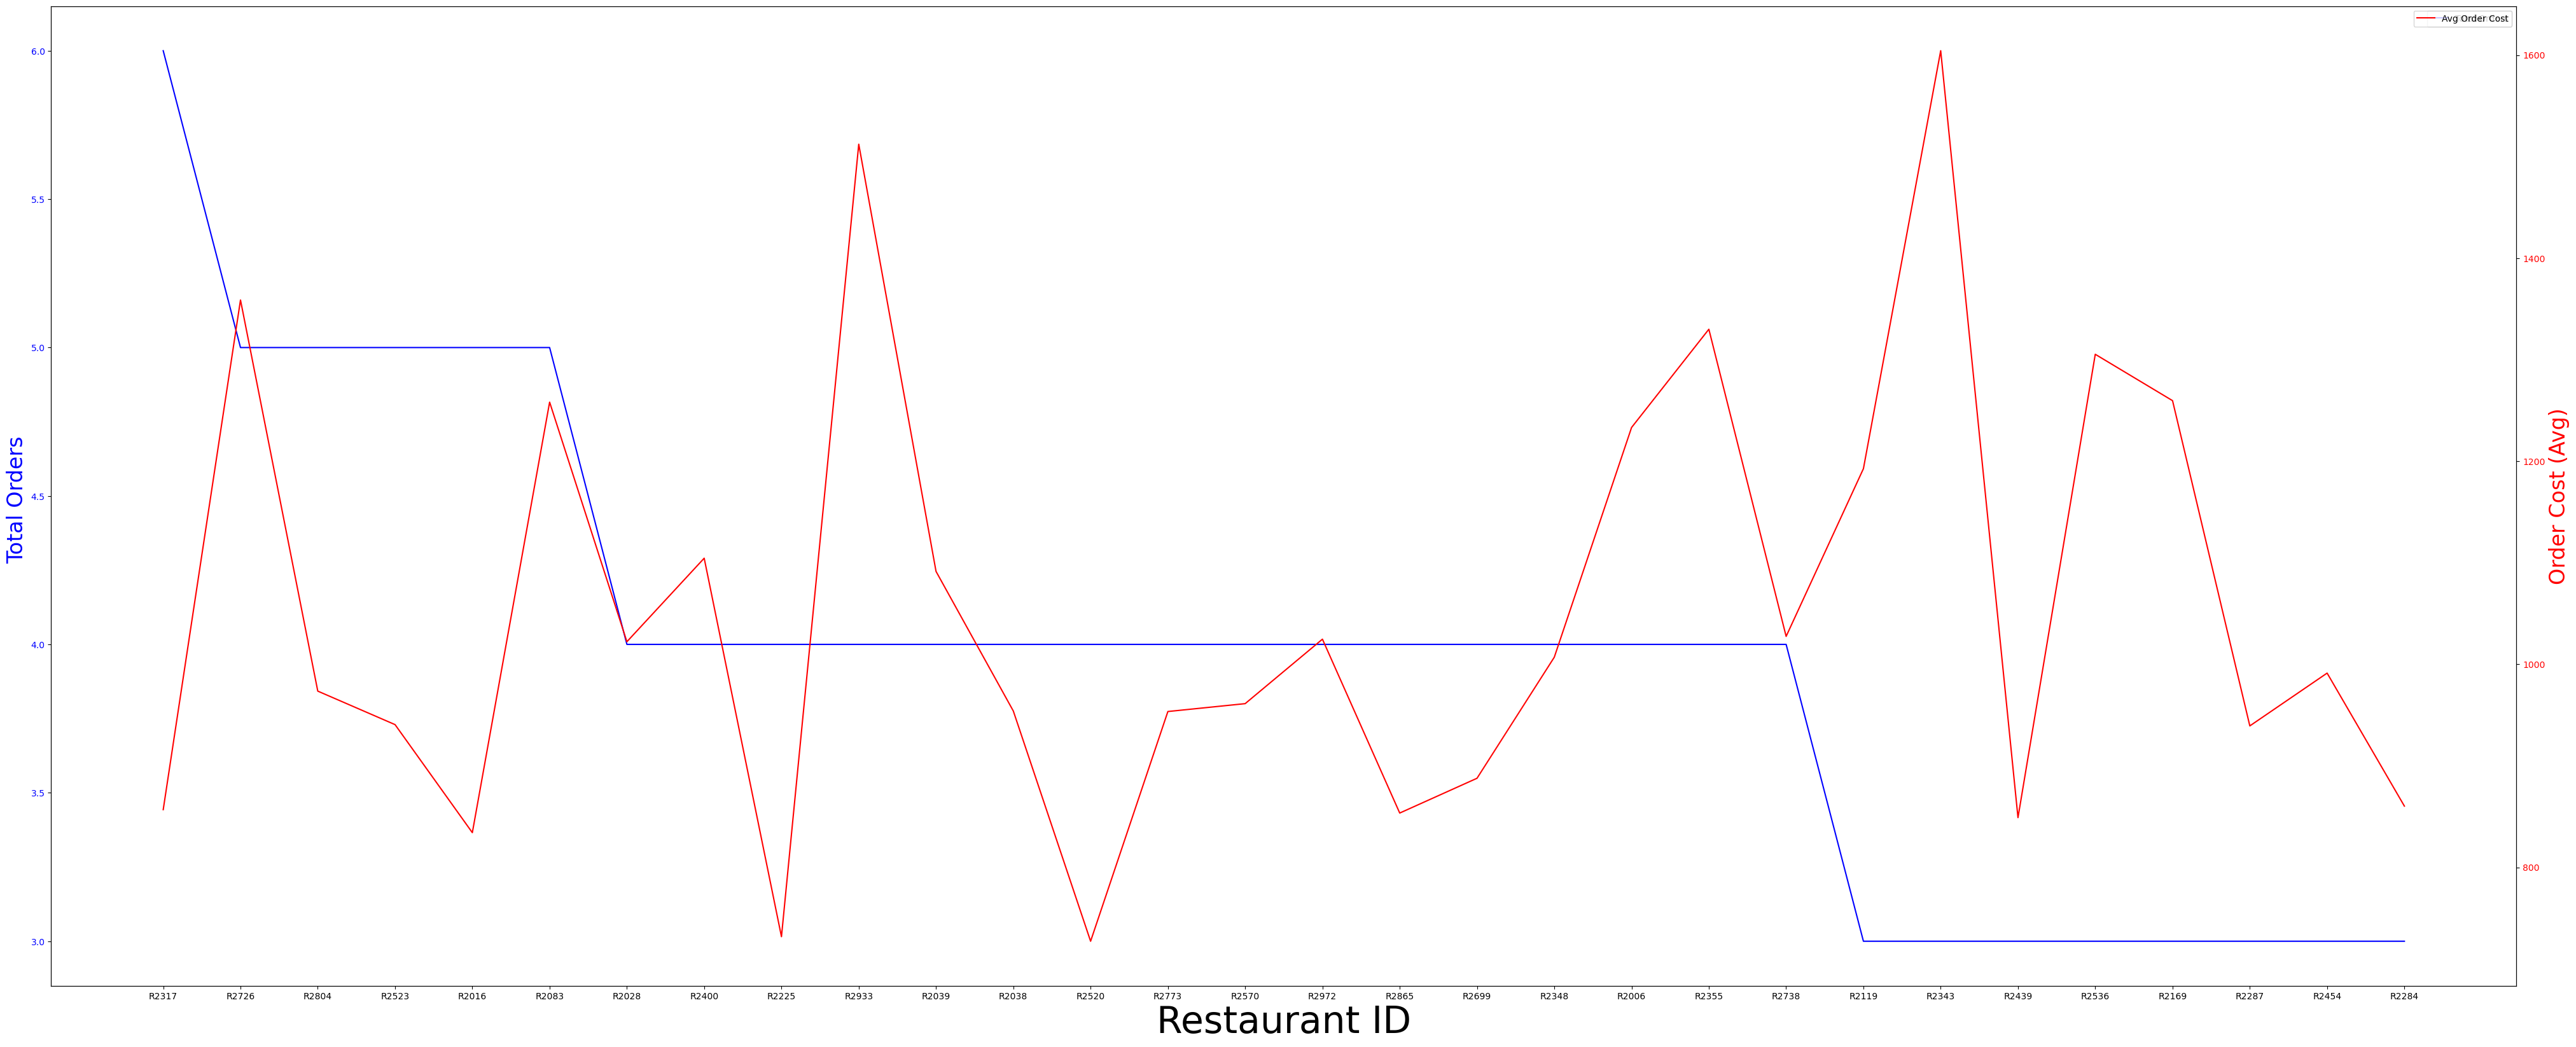

    Restaurant ID     PaymentMethod  Count
15          R2016  Cash on Delivery      4
270         R2317       Credit Card      4
373         R2439       Credit Card      3
823         R2972  Cash on Delivery      3
670         R2804    Digital Wallet      3
..            ...               ...    ...
366         R2427  Cash on Delivery      1
367         R2428       Credit Card      1
368         R2429       Credit Card      1
369         R2429    Digital Wallet      1
854         R2997    Digital Wallet      1

[855 rows x 3 columns]


In [9]:

# Grouping by 'Restaurant ID' and calculating the total number of orders and the average order amount
df3 = df1.groupby('Restaurant ID').agg({"Count": "sum", "Amount": "mean"}).reset_index().sort_values(by='Count', ascending=False)
print(df3)

# Set up the plot size and figure for the dual-axis plot
plt.figure()
fig, ax1 = plt.subplots(figsize=(50, 20))

# Create the first plot with the primary y-axis for 'Total Orders'
# Plotting the top 30 restaurants by 'Restaurant ID' and their 'Count' of orders
sns.lineplot(x='Restaurant ID', y='Count', data=df3.head(30), ax=ax1, color='b', label='Total Orders')

# Labeling the primary y-axis (left) and setting the color to match the line
ax1.set_ylabel('Total Orders ', color='b', fontsize=24)
ax1.set_xlabel("Restaurant ID", fontsize=42)
ax1.tick_params(axis='y', labelcolor='b')  # Make y-axis tick labels blue to match the line

# Create a second y-axis on the right side to plot the 'Avg Order Cost'
ax2 = ax1.twinx()  # This creates a second axis that shares the same x-axis

# Plotting the 'Avg Order Cost' (mean order amount) on the secondary y-axis (right side)
sns.lineplot(x='Restaurant ID', y='Amount', data=df3.head(30), ax=ax2, color='r', label='Avg Order Cost')

# Labeling the secondary y-axis (right) and setting the color to match the line
ax2.set_ylabel('Order Cost (Avg)', color='r', fontsize=24)
ax2.tick_params(axis='y', labelcolor='r')  # Make y-axis tick labels red to match the line

# Display the plot
plt.show()

# Grouping by 'Restaurant ID' and 'PaymentMethod' to calculate the total number of orders for each payment method
df4 = df1.groupby(['Restaurant ID', "PaymentMethod"]).agg({"Count": "sum"}).reset_index().sort_values(by='Count', ascending=False)

# Printing the grouped dataframe to see the results
print(df4)


Impact of Delivery Fee on Restaurant's Order Placement

<Figure size 640x480 with 0 Axes>

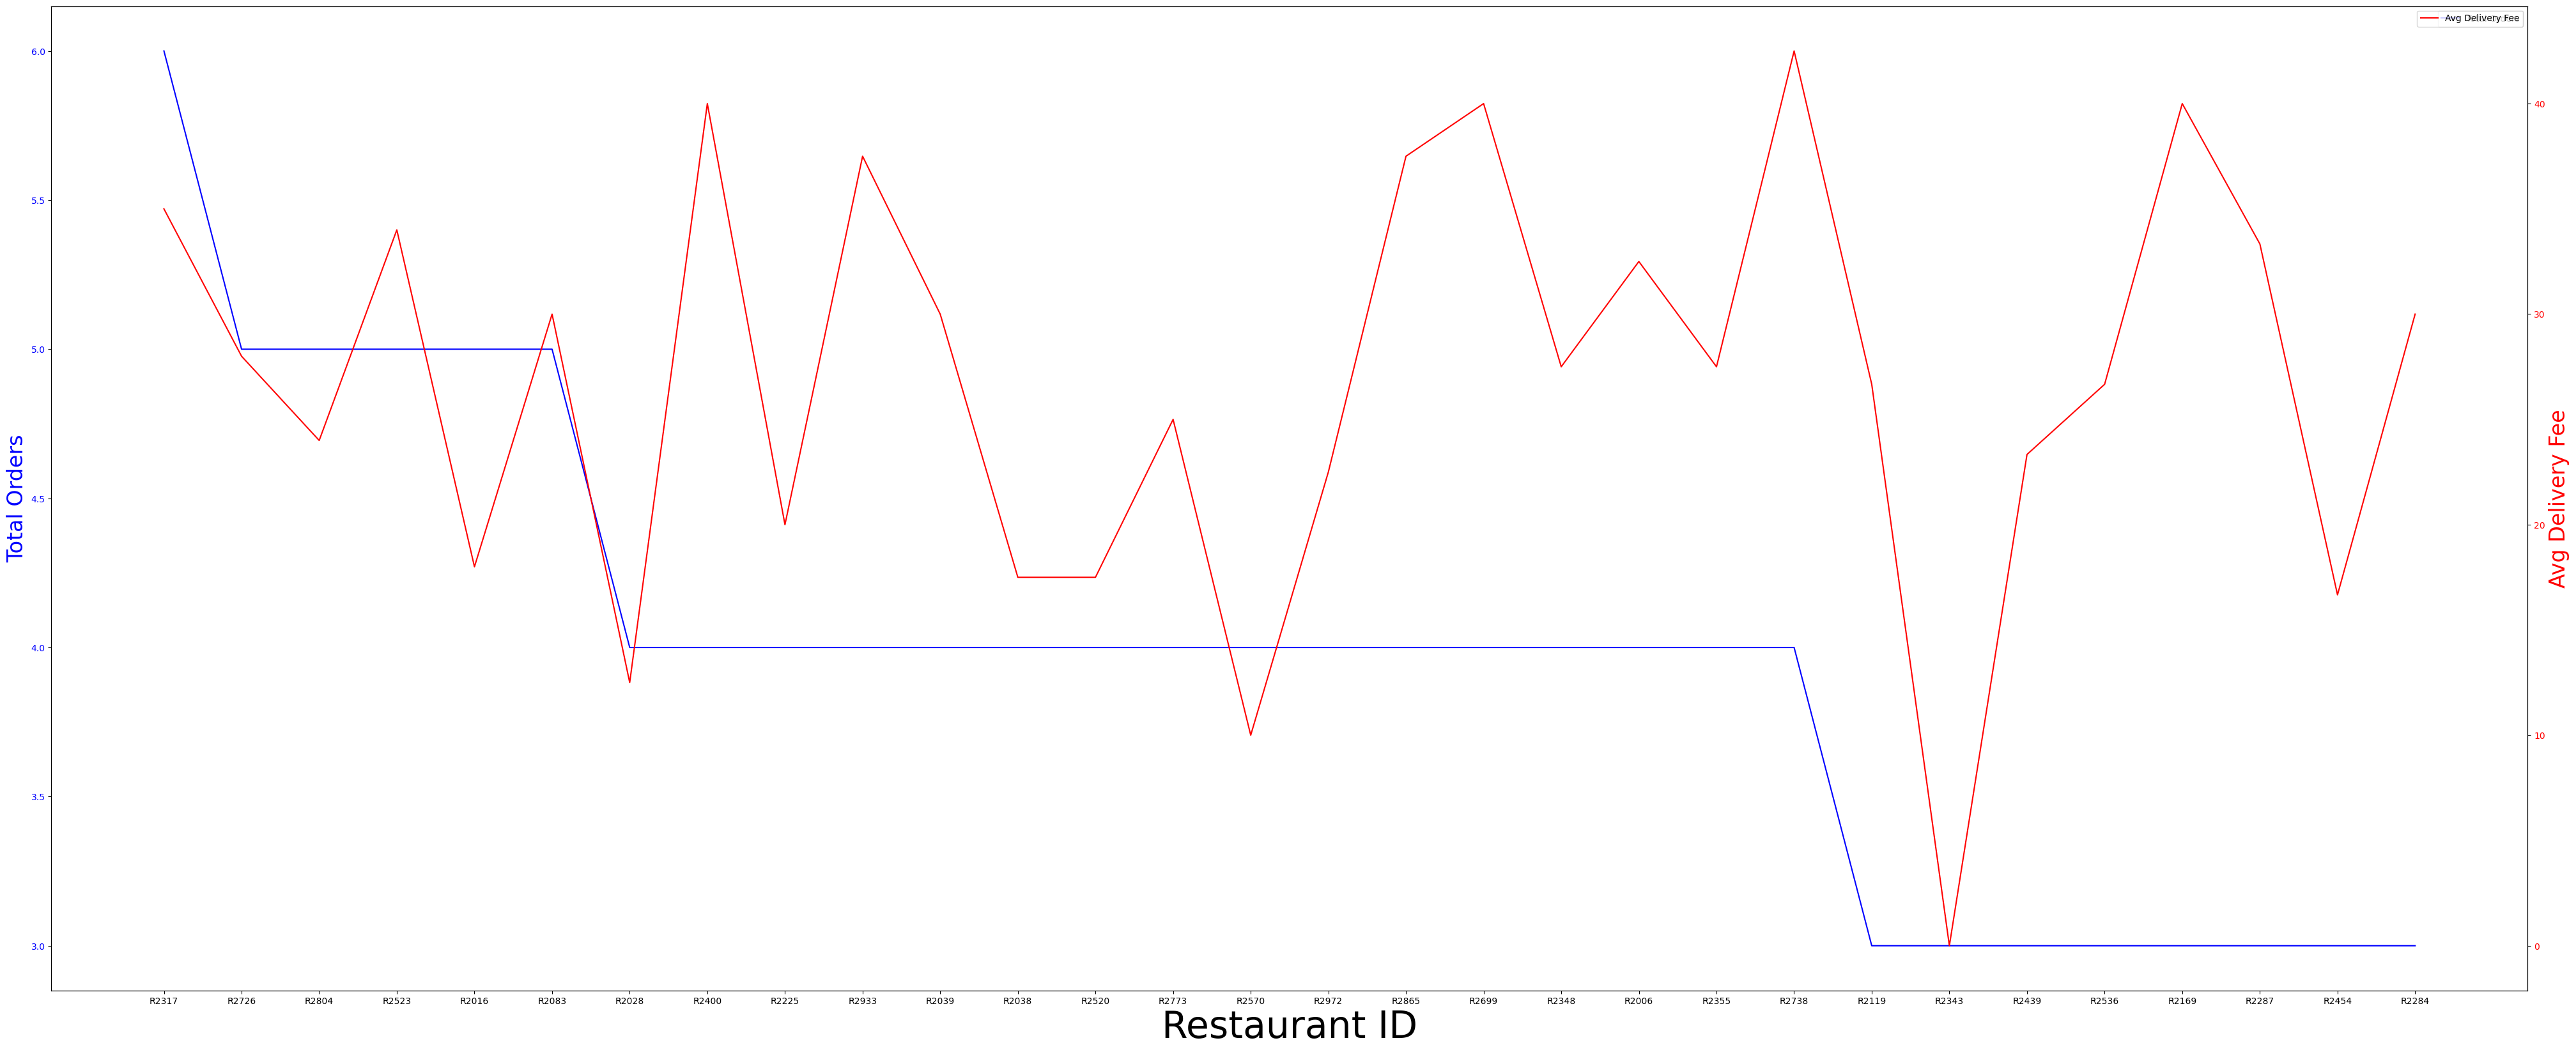

    Restaurant ID     Refunds  Count
187         R2317   41.666667      6
128         R2804   50.000000      5
175         R2016   50.000000      5
243         R2523   10.000000      5
244         R2726   10.000000      5
..            ...         ...    ...
364         R2877    0.000000      1
363         R2878    0.000000      1
362         R2881    0.000000      1
361         R2861    0.000000      1
0           R2095  150.000000      1

[621 rows x 3 columns]


<Figure size 640x480 with 0 Axes>

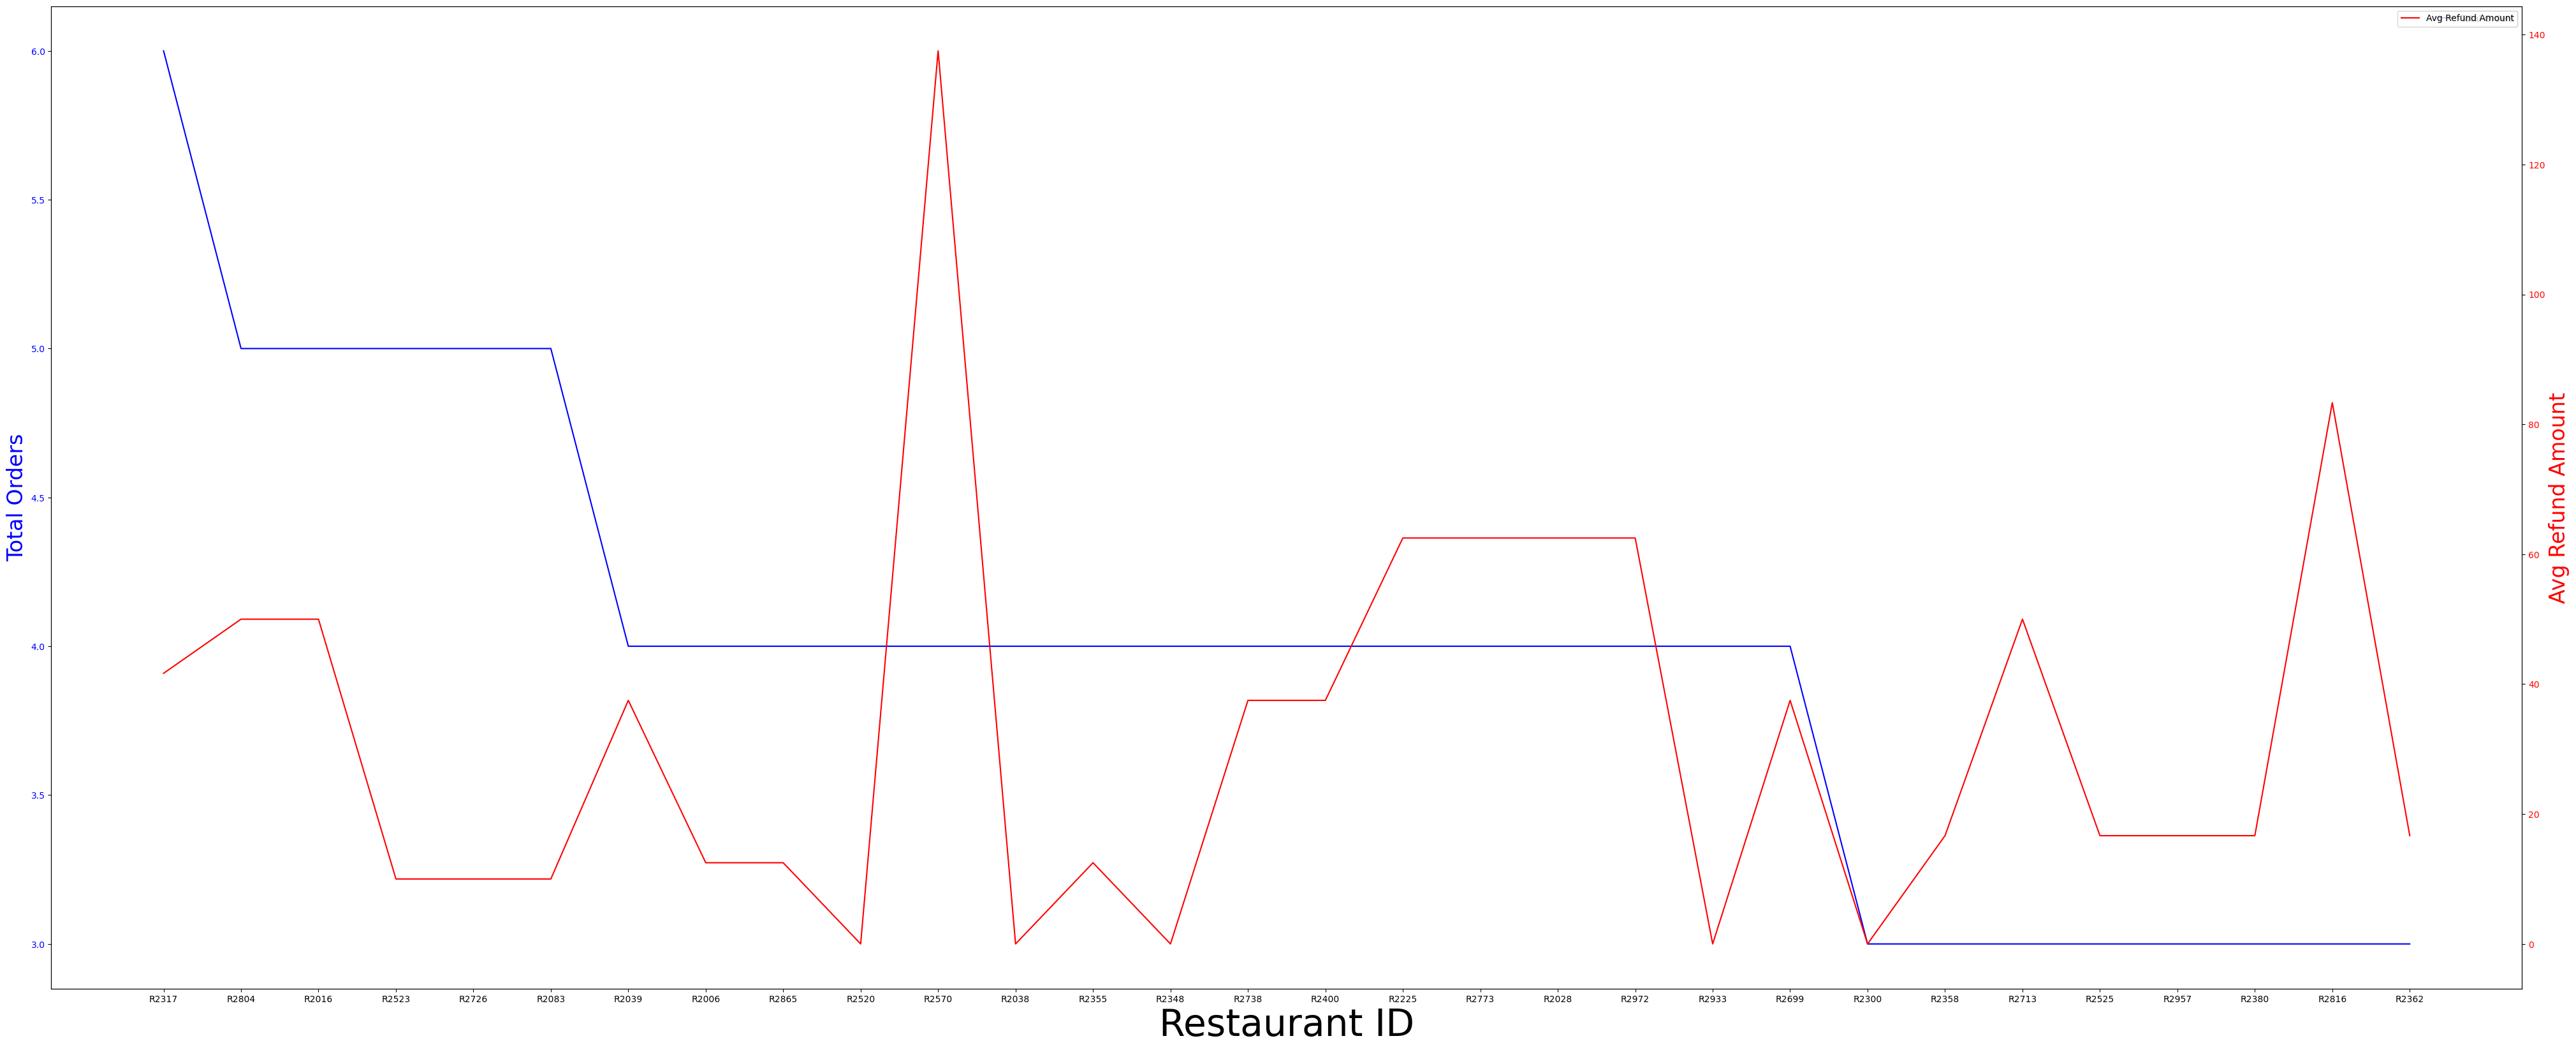

In [10]:

# Step 1: Group by 'Restaurant ID' and calculate the average delivery fee
df6 = df1.groupby("Restaurant ID").agg({"DeliveryFee": "mean"}).reset_index()

# Step 2: Merge the delivery fee data (df6) with another dataframe (df2) on 'Restaurant ID'
df7 = df6.merge(df2, on='Restaurant ID')

# Step 3: Sort the merged dataframe (df7) by the total orders count in descending order
df7 = df7.sort_values(by='Count', ascending=False)

# Step 4: Create a dual-axis line plot for the top 30 restaurants
plt.figure()
fig, ax1 = plt.subplots(figsize=(50, 20))

# Plot the 'Total Orders' on the primary y-axis
sns.lineplot(x='Restaurant ID', y='Count', data=df7.head(30), ax=ax1, color='b', label='Total Orders')
ax1.set_ylabel('Total Orders', color='b', fontsize=24)
ax1.set_xlabel("Restaurant ID", fontsize=42)
ax1.tick_params(axis='y', labelcolor='b')  # Blue labels for y-axis ticks

# Create the second y-axis (right side) for 'DeliveryFee'
ax2 = ax1.twinx()  # This shares the x-axis with ax1

# Plot the 'Avg Delivery Fee' on the secondary y-axis
sns.lineplot(x='Restaurant ID', y='DeliveryFee', data=df7.head(30), ax=ax2, color='r', label='Avg Delivery Fee')
ax2.set_ylabel('Avg Delivery Fee', color='r', fontsize=24)
ax2.tick_params(axis='y', labelcolor='r')  # Red labels for y-axis ticks

# Display the plot
plt.show()

# Step 5: Group by 'Restaurant ID' and calculate the average refunds amount
df3 = df1.groupby('Restaurant ID').agg({"Refunds": "mean"}).reset_index().sort_values(by='Refunds', ascending=False)

# Step 6: Merge the refund data (df3) with df2 to combine with 'Count' (total orders)
df7 = df3.merge(df2, on='Restaurant ID')

# Step 7: Sort the merged dataframe (df7) by the total orders count in descending order
df7 = df7.sort_values(by='Count', ascending=False)

# Print the dataframe for debugging purposes
print(df7)

# Step 8: Create a second dual-axis line plot for total orders vs. refunds
plt.figure()
fig, ax1 = plt.subplots(figsize=(50, 20))

# Plot the 'Total Orders' on the primary y-axis
sns.lineplot(x='Restaurant ID', y='Count', data=df7.head(30), ax=ax1, color='b', label='Total Orders')
ax1.set_ylabel('Total Orders', color='b', fontsize=24)
ax1.set_xlabel("Restaurant ID", fontsize=42)
ax1.tick_params(axis='y', labelcolor='b')  # Blue labels for y-axis ticks

# Create the second y-axis (right side) for 'Refunds'
ax2 = ax1.twinx()  # This shares the x-axis with ax1

# Plot the 'Avg Refund Amount' on the secondary y-axis
sns.lineplot(x='Restaurant ID', y='Refunds', data=df7.head(30), ax=ax2, color='r', label='Avg Refund Amount')
ax2.set_ylabel('Avg Refund Amount', color='r', fontsize=24)
ax2.tick_params(axis='y', labelcolor='r')  # Red labels for y-axis ticks

# Display the plot
plt.show()


## Detailed Insights and Analysis

- **Impact of Fulfillment Time on Customer Orders**: The average fulfillment time plays a crucial role in determining the number of orders placed by customers. A longer fulfillment time correlates with fewer orders, suggesting that customers prefer restaurants that can deliver more quickly and efficiently.

- **Customer Preference for Payment Methods**: There is no significant customer preference when it comes to payment methods. The distribution of payment choices (such as card, online payments, or cash) is relatively even, with each method accounting for approximately 33% of the total payments. This indicates that customers are flexible and do not favor any particular payment type.

- **Effect of Order Cost on Restaurant Popularity**: Higher menu prices tend to negatively affect the popularity of a restaurant. As the cost of orders increases, the total number of orders tends to decrease, indicating that customers are price-sensitive and more inclined to order from restaurants with affordable options.

- **Influence of Delivery Time on Restaurant Popularity**: Similar to fulfillment time, delivery speed significantly influences restaurant popularity. Restaurants that can ensure quicker delivery are more likely to receive higher order volumes. Customers prioritize convenience and are more likely to reorder from establishments that provide timely service.

- **Relationship Between Refund Requests and Total Orders**: There is an inverse relationship between the number of refund requests a restaurant receives and the total number of orders placed. Restaurants with a higher incidence of refund requests typically see a decline in customer orders, likely due to dissatisfaction with the service or product quality.

